In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

In [44]:
file <- file.path("results", "spearman_correlation_single_cells_per_condition.tsv")
sc_df <- readr::read_tsv(file)

dim(sc_df)
head(sc_df)

Parsed with column specification:
cols(
  comparison = col_character(),
  median_val = col_double(),
  low_ci = col_double(),
  high_ci = col_double(),
  num_cells = col_integer(),
  well_num = col_character(),
  timepoint = col_integer(),
  density = col_integer(),
  cell_id = col_character(),
  plate_id = col_character(),
  sc_type = col_character()
)


[1] 3054   11

comparison,median_val,low_ci,high_ci,num_cells,well_num,timepoint,density,cell_id,plate_id,sc_type
<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
permuted,0.8788646,0.7920892,0.9265287,121,A01,6,5000,A,BR00103267,isolated
real,0.8983973,0.8326106,0.9353029,121,A01,6,5000,A,BR00103267,isolated
permuted,0.8726304,0.7731969,0.9248136,153,A02,6,5000,A,BR00103267,isolated
real,0.8912284,0.7995298,0.9302763,153,A02,6,5000,A,BR00103267,isolated
permuted,0.8480020,0.7514357,0.9105183,371,A03,6,15000,B,BR00103267,isolated
real,0.8459468,0.7413723,0.9103221,371,A03,6,15000,B,BR00103267,isolated


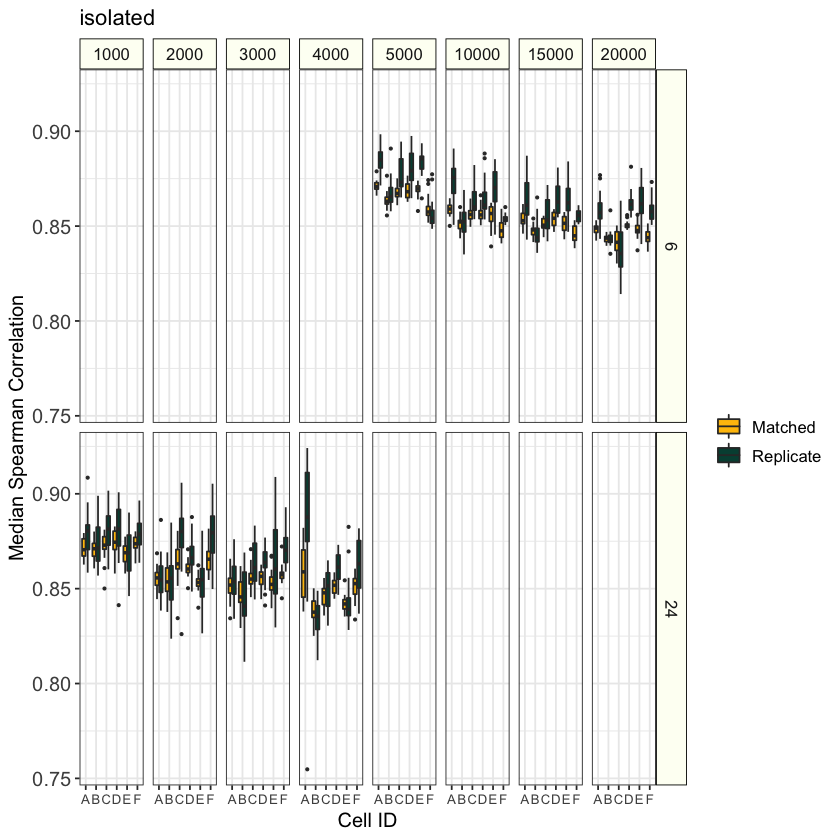

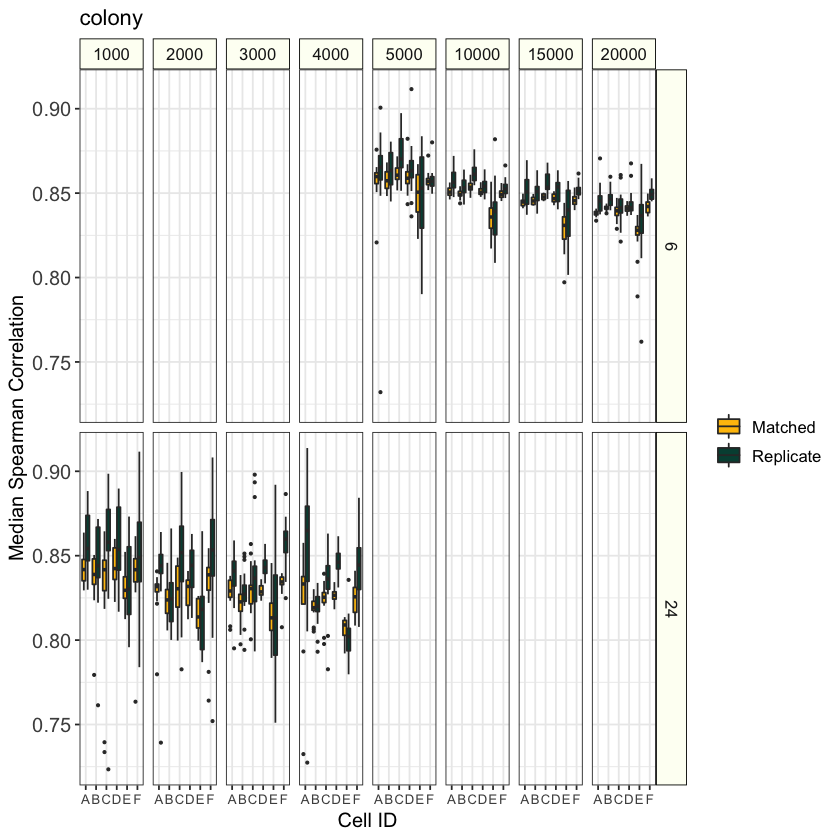

In [46]:
for (sc_type in unique(sc_df$sc_type)) {
    sub_sc_df <- sc_df %>%
        dplyr::filter(sc_type == !!sc_type)
    
    sc_gg <- ggplot(sub_sc_df,
       aes(x = cell_id,
           y = median_val,
           fill = comparison)) +
        geom_boxplot(outlier.size = 0.5) +
        facet_grid(timepoint ~ density) +
        ggtitle(sc_type) +
        scale_fill_manual(name = "",
                          labels = c("permuted" = "Matched", "real" = "Replicate"),
                          values = c("#FFC107", "#004D40")) +
        ylab("Median Spearman Correlation") +
        xlab("Cell ID") +
        theme_bw() + 
        theme(axis.text.y = element_text(size = 12),
              axis.text.x = element_text(size = 8),
              axis.title = element_text(size = 12),
              legend.text = element_text(size = 10),
              strip.text = element_text(size = 10),
              strip.background = element_rect(colour = "black",
                                              fill = "#fdfff4"))

    file_base <- file.path("figures", paste0("spearman_sc_condition_pilot_", sc_type))
    print(sc_gg)
    for (extension in c('.png', '.pdf')) {
        ggsave(sc_gg,
               filename = paste0(file_base, extension),
               height = 8,
               width = 12)
    }
}



In [21]:
file <- file.path("results", "num_single_cells_per_condition.tsv")
num_sc_df <- readr::read_tsv(file)

dim(num_sc_df)
head(num_sc_df)

Parsed with column specification:
cols(
  Metadata_line_ID = col_character(),
  Metadata_timepoint = col_integer(),
  Metadata_plating_density = col_integer(),
  n = col_integer(),
  plate_id = col_character(),
  sc_type = col_character()
)


[1] 96  6

Metadata_line_ID,Metadata_timepoint,Metadata_plating_density,n,plate_id,sc_type
<chr>,<int>,<int>,<int>,<chr>,<chr>
A,6,5000,2285,BR00103267,isolated
A,6,10000,3077,BR00103267,isolated
A,6,15000,3014,BR00103267,isolated
A,6,20000,3049,BR00103267,isolated
B,6,5000,3408,BR00103267,isolated
B,6,10000,5038,BR00103267,isolated


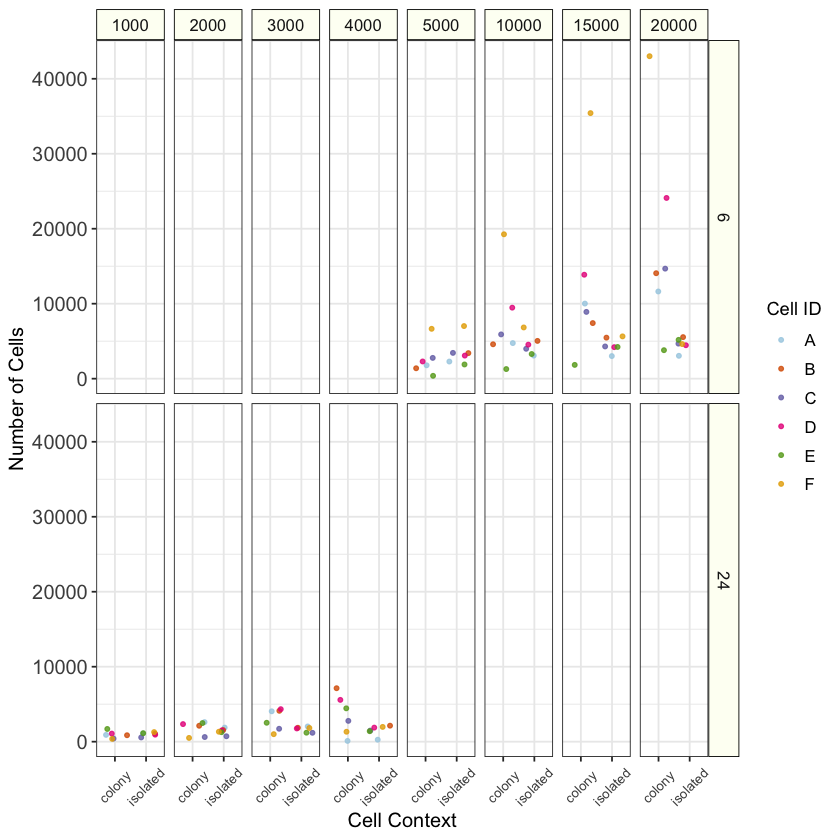

In [41]:
ggplot(num_sc_df,
       aes(x = sc_type,
           y = n,
           color = Metadata_line_ID)) +
        geom_jitter(size = 1, alpha = 0.8) +
        facet_grid(Metadata_timepoint ~ Metadata_plating_density) +
         scale_color_manual(name = "Cell ID",
                               values = c("#a6cee3",
                                          "#d95f02",
                                          "#7570b3",
                                          "#e7298a",
                                          "#66a61e",
                                          "#e6ab02")) +
        ylab("Number of Cells") +
        xlab("Cell Context") +
        theme_bw() + 
        theme(axis.text.y = element_text(size = 12),
              axis.text.x = element_text(size = 8, angle = 45, vjust = 0.5),
              axis.title = element_text(size = 12),
              legend.text = element_text(size = 10),
              strip.text = element_text(size = 10),
              strip.background = element_rect(colour = "black",
                                              fill = "#fdfff4"))

file_base <- file.path("figures", paste0("sc_num_cells_pilot_", sc_type))
for (extension in c('.png', '.pdf')) {
    ggsave(filename = paste0(file_base, extension),
           height = 5,
           width = 8)
}